In [2]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Linear SVM                     
-> Loading the dataset
-> Scaling the feature
-> Training the linear SVM 


In [3]:

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"] ==2).astype(np.float64)  # Iris-Virginica or not

svm_clf= Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge",))
])
 

In [4]:
svm_clf.fit(X, y)  # Fit the pipeline on training data

# Now predict
prediction = svm_clf.predict([[5.5, 1.7]])
print(prediction)

[1.]


**Non Linear SVM Classification**
**READ THIS IMP**

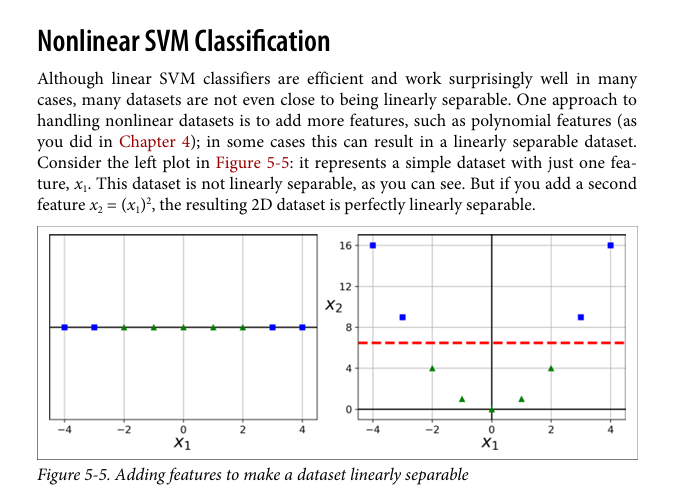

**So now as per the above photo, to implement the idea of Non-Linear SVM**                                  
->WE Create a pipeline containing a polynomialfeature tranformer                      
->Followed by StandardScaler and a LinearSVC

In [5]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
X,y= make_moons(n_samples=100, noise =0.15)
polynomial_svm_clf=Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X,y)

c:\Users\varad\OneDrive\Documents\Aurelian Geron\.venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('poly_features', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


**Polynomial Kernel** *Trick* 

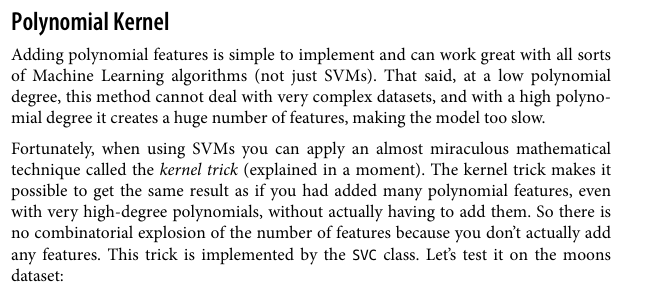

In [6]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly",degree=3,coef0=1,C=5))
])

poly_kernel_svm_clf.fit(X,y)

,steps,"[('scaler', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,3
,gamma,'scale'


🔍 What does coef0 do?            
coef0 controls the influence of higher-degree vs lower-degree polynomial terms.           

If coef0 is small (close to 0), higher-degree terms dominate → more curved, wiggly, complex boundaries →   risk of overfitting.           

If coef0 is large, lower-degree terms dominate (e.g., linear-ish behavior) → smoother, simpler model → risk   of underfitting.                        

✅ So you're correct:                  
Situation	What to do with coef0                  
🔼 Underfitting	🔽 Decrease coef0 → allow more curvature / complexity                   
🔽 Overfitting	🔼 Increase coef0 → flatten the decision boundary                 

**Similarity Features**

We can use the RBF Kernel which will transform the nonlinear prb in such a way that the features can be separated


In [7]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf",SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

,steps,"[('scaler', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,0.001
,kernel,'rbf'
,degree,3
,gamma,5


***LINEAR SVM REGRESSION***

In [8]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

,epsilon,1.5
,tol,0.0001
,C,1.0
,loss,'epsilon_insensitive'
,fit_intercept,True
,intercept_scaling,1.0
,dual,'auto'
,verbose,0
,random_state,None
,max_iter,1000


In [9]:
from sklearn.svm import SVR

svm_poly_reg= SVR(kernel = "poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1
